# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.186102e+01     6.911418e+00
 * time: 0.004171848297119141
     1     2.780080e+01     3.757367e+00
 * time: 0.012274980545043945
     2     2.254018e+01     6.414329e+00
 * time: 0.03157687187194824
     3     1.333780e+01     1.735398e+00
 * time: 0.05478191375732422
     4     1.325163e+01     4.056004e+00
 * time: 0.0703129768371582
     5     1.301175e+01     2.303050e+00
 * time: 0.08591890335083008
     6     1.203710e+01     1.651500e+00
 * time: 0.10145401954650879
     7     1.128919e+01     3.259795e+00
 * time: 0.11694693565368652
     8     1.049904e+01     1.891616e+00
 * time: 0.13233494758605957
     9     9.919020e+00     9.611294e-01
 * time: 0.1477198600769043
    10     9.470015e+00     8.169519e-01
 * time: 0.16321301460266113
    11     9.257310e+00     4.879471e-01
 * time: 0.1786799430847168
    12     9.237791e+00     6.109363e-01
 * time: 0.19046783447265625
    13     9.202664e+00     4.081431e-01
 * time: 

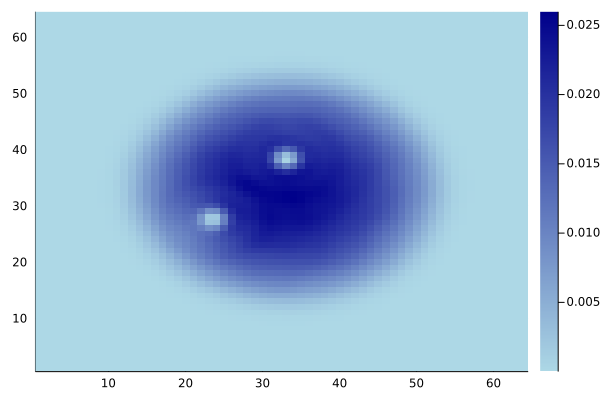

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)